# nn.Linear 계층 예제

In [2]:
import torch

In [3]:
import torch.nn as nn

Input = torch.randn(128, 20)
print(Input)

m = nn.Linear(20, 30)
print(m)

output = m(Input)
print(output)
print(output.size())

tensor([[ 0.6870, -1.5467, -0.8464,  ..., -1.2999,  0.6241, -0.3654],
        [ 0.6564, -0.7227, -0.5588,  ..., -0.3416, -0.6561, -0.8170],
        [ 0.3717, -0.4404,  1.4306,  ...,  1.7110,  1.3119,  1.3075],
        ...,
        [ 0.1569,  0.5434,  0.1711,  ..., -0.1039,  0.7519, -0.1271],
        [-1.6481,  0.1968, -0.0426,  ...,  0.1939, -0.2912, -1.5848],
        [ 0.8754,  0.9234,  0.3121,  ..., -0.0735, -0.9259, -0.4233]])
Linear(in_features=20, out_features=30, bias=True)
tensor([[-0.1419,  0.2487,  0.1061,  ..., -0.0132,  0.1462,  1.4550],
        [ 0.2977, -0.1167,  1.1227,  ..., -0.7210,  1.2312,  0.1440],
        [-0.0221,  0.2857,  0.7508,  ...,  0.2563,  0.9775, -1.1622],
        ...,
        [-0.8654, -0.6532,  0.4863,  ..., -0.0103, -0.3432,  0.1990],
        [-0.4107, -0.0601,  0.0456,  ..., -0.4291,  0.1530, -0.5528],
        [-0.6979, -0.3456,  0.9837,  ...,  0.5115,  0.5337,  1.3199]],
       grad_fn=<AddmmBackward0>)
torch.Size([128, 30])


# nn.Conv2d

In [4]:
Input = torch.randn(20, 16, 50, 100)
print(Input.size())

torch.Size([20, 16, 50, 100])


In [5]:
m = nn.Conv2d(16, 33, 3, stride=2)
m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2))
m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))
print(m)

Conv2d(16, 33, kernel_size=(3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))


In [6]:
output = m(Input)
print(output.size())

torch.Size([20, 33, 26, 100])


In [7]:
layer = nn.Conv2d(1, 20, 5, 1)
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [8]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

In [9]:
import numpy as np

weight = weight.detach()
weight = weight.numpy()
weight.shape

(20, 1, 5, 5)

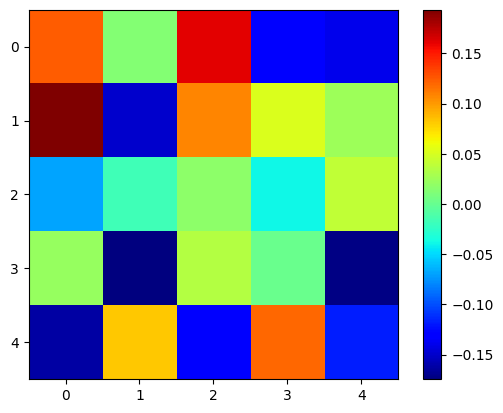

In [10]:
import matplotlib.pyplot as plt

plt.imshow(weight[0, 0, :, :], "jet")
plt.colorbar()
plt.show()

# 모델 정의

- `nn.Module`을 상속받는 클래스를 정의한다.
- `__init__()` : 모델에서 사용될 모듈과 활성화 함수 등을 정의한다.
- `forward()` : 모델에서 실행되어야 하는 연산을 정의한다.

In [11]:
class Model(nn.Module):
    def __init__(self, inputs) -> None:
        super(Model, self).__init__()
        self.layer = nn.Linear(inputs, 1)
        self.activation = nn.Sigmoid()

    def forward(self, x):
        x = self.layer(x)
        x = self.activation(x)
        return x

In [12]:
model = Model(1)
print(list(model.children()))
print(list(model.modules()))

[Linear(in_features=1, out_features=1, bias=True), Sigmoid()]
[Model(
  (layer): Linear(in_features=1, out_features=1, bias=True)
  (activation): Sigmoid()
), Linear(in_features=1, out_features=1, bias=True), Sigmoid()]


In [13]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 64, 5, 1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(64, 30, 5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)
        )
        self.layer3 = nn.Sequential(
            nn.Linear(30*5*5, 10, bias=True),
            nn.ReLU(inplace=True)
        )
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = x.view(x.shape[0], -1)
        x = self.layer3(x)
        return x

In [14]:
model = Model()
print(list(model.modules()))

[Model(
  (layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Linear(in_features=750, out_features=10, bias=True)
    (1): ReLU(inplace=True)
  )
), Sequential(
  (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1)), ReLU(inplace=True), MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), Sequential(
  (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, di

# Cifar10 Datasets

In [33]:
import os
from path import path

classes = sorted(entry.name for entry in os.scandir(path + "/train") if entry.is_dir())
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

Feature batch shape: torch.Size([3, 32, 32])
Label num: 1


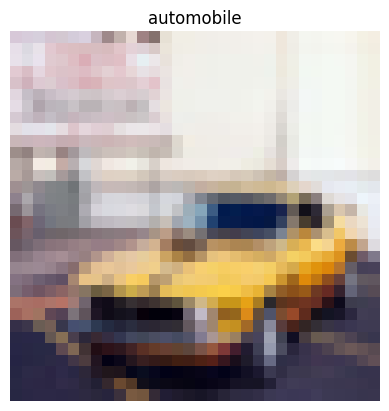

In [ ]:
import matplotlib.pyplot as plt
import path, Datasets
train = Datasets.Datasets(path.path, train=True)

train_features, train_labels = train[5001]
label_list = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

print(f"Feature batch shape: {train_features.size()}")
print(f"Label num: {train_labels}")
img = train_features.permute(1, 2, 0)
label = label_list[train_labels]
plt.imshow(img)
plt.title(label)
plt.axis("off")
plt.show()

# Cifar10 training

In [35]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [36]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [51]:
class Cifar10_Model1(nn.Module):
    def __init__(self) -> None:
        super(Cifar10_Model1, self).__init__()
        self.flatten = nn.Flatten()
        self.nn1 = nn.Sequential(
            nn.Linear(3 * 32 * 32, 512),
            nn.ReLU(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )
    def forward(self, x):
        x = self.flatten(x)
        x = self.nn1(x)
        return x

In [52]:
model = Cifar10_Model1().to(device)
print(model)

Cifar10_Model1(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (nn1): Sequential(
    (0): Linear(in_features=3072, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [57]:
import Datasets, path

sample_x, label = Datasets.Datasets(
    path.path,
    True
)[5001]
sample_x = sample_x.to("cuda").unsqueeze(0)

logit = model(sample_x)
pred_probab = nn.Softmax(dim=1)(logit)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([4], device='cuda:0')


In [60]:
import torch
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import Datasets, path

# 1. 데이터셋 및 DataLoader
train_dataset = Datasets.Datasets(path.path, train=True)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=8)

# 2. 모델, 손실 함수, 옵티마이저 정의
model = Cifar10_Model1().to("cuda")
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# 3. 학습 루프
num_epochs = 100

for epoch in range(num_epochs):
    model.train()  # 학습 모드
    total_loss = 0
    correct = 0
    total = 0
    
    for batch_x, batch_y in train_loader:
        batch_x, batch_y = batch_x.to("cuda"), batch_y.to("cuda")

        # Forward
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)

        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # 통계
        total_loss += loss.item()
        preds = outputs.argmax(dim=1)
        correct += (preds == batch_y).sum().item()
        total += batch_y.size(0)
    
    acc = correct / total * 100
    print(f"[Epoch {epoch+1}] Loss: {total_loss:.4f}, Accuracy: {acc:.2f}%")


[Epoch 1] Loss: 1459.6530, Accuracy: 32.14%
[Epoch 2] Loss: 1297.7981, Accuracy: 40.71%
[Epoch 3] Loss: 1234.2752, Accuracy: 43.73%
[Epoch 4] Loss: 1192.8147, Accuracy: 45.57%
[Epoch 5] Loss: 1160.3119, Accuracy: 47.07%
[Epoch 6] Loss: 1132.3255, Accuracy: 48.59%
[Epoch 7] Loss: 1112.1953, Accuracy: 49.35%
[Epoch 8] Loss: 1094.1637, Accuracy: 50.07%
[Epoch 9] Loss: 1075.2854, Accuracy: 51.02%
[Epoch 10] Loss: 1059.5040, Accuracy: 51.83%
[Epoch 11] Loss: 1044.2893, Accuracy: 52.53%
[Epoch 12] Loss: 1026.8717, Accuracy: 53.53%
[Epoch 13] Loss: 1012.9167, Accuracy: 53.75%
[Epoch 14] Loss: 1005.0864, Accuracy: 54.12%
[Epoch 15] Loss: 989.1738, Accuracy: 54.98%
[Epoch 16] Loss: 976.6665, Accuracy: 55.57%
[Epoch 17] Loss: 959.7789, Accuracy: 56.19%
[Epoch 18] Loss: 954.2420, Accuracy: 56.60%
[Epoch 19] Loss: 943.1605, Accuracy: 56.74%
[Epoch 20] Loss: 933.5286, Accuracy: 57.26%
[Epoch 21] Loss: 922.2309, Accuracy: 57.83%
[Epoch 22] Loss: 913.6948, Accuracy: 58.16%
[Epoch 23] Loss: 903.9357, 

In [61]:
torch.save(model.state_dict(), "cifar10_model1.pt")

## 모델 로드

In [ ]:
model = Cifar10_Model1().to("cuda")
model.load_state_dict(torch.load("cifar10_model1.pt"))

sample_x, label = Datasets.Datasets(
    path.path,
    True
)[5001]
sample_x = sample_x.to("cuda").unsqueeze(0)

logit = model(sample_x)
pred_probab = nn.Softmax(dim=1)(logit)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([2], device='cuda:0')
